In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\irish\Documents\Python\Group Project\heart_failure_clinical_records_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [11]:
#Defining independent variables
X= df[['age', 'diabetes', 'high_blood_pressure', 'serum_creatinine']]
#Defining dependent variables
y= df['DEATH_EVENT']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create and train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 0.2602475336445426
R-squared: -0.07073270985183244


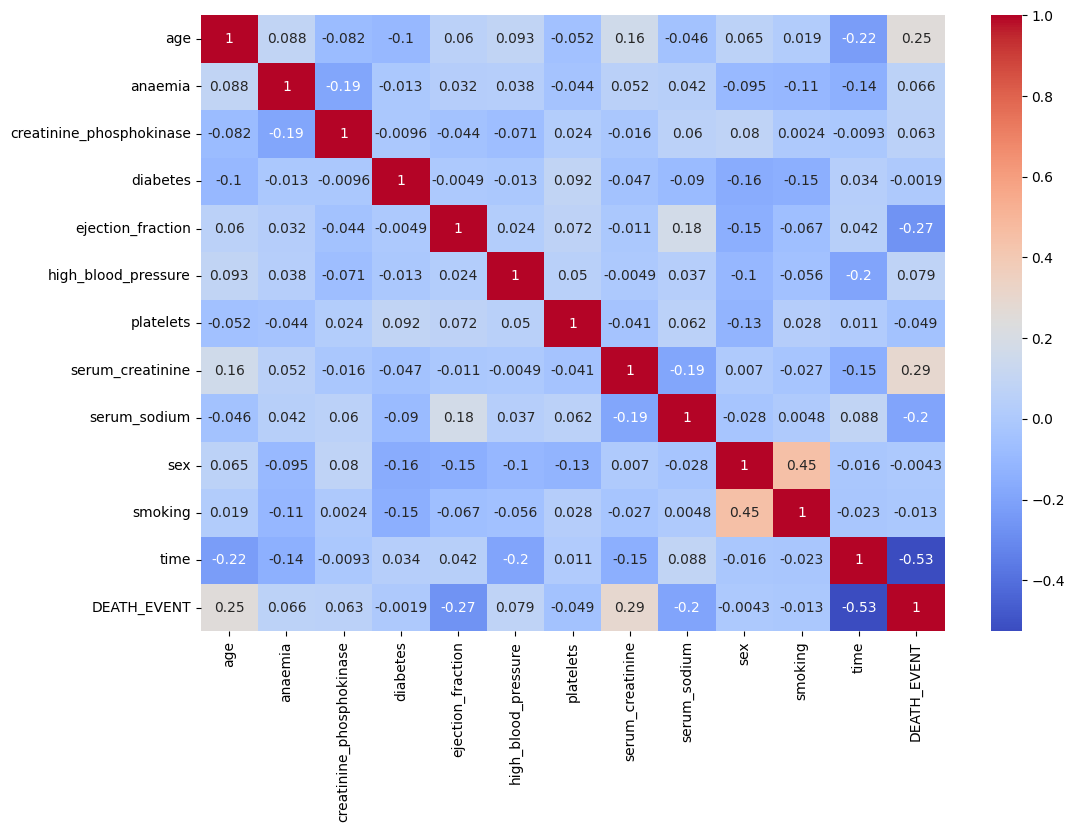

In [12]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

C:\Users\irish\AppData\Local\Temp\ipykernel_27028\687692202.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DEATH_EVENT', data=df, palette=['#DE5596'])
C:\Users\irish\AppData\Local\Temp\ipykernel_27028\687692202.py:9: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='DEATH_EVENT', data=df, palette=['#DE5596'])


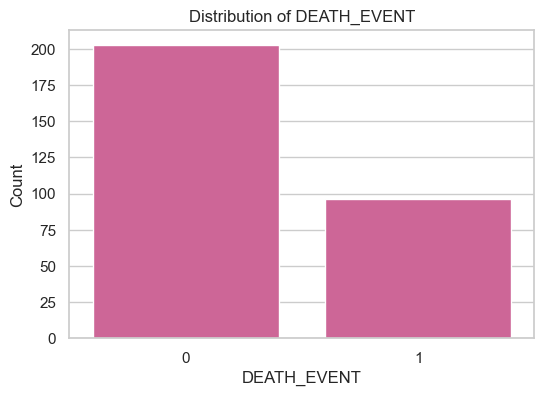

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot distribution of the target variable (DEATH_EVENT)
plt.figure(figsize=(6, 4))
sns.countplot(x='DEATH_EVENT', data=df, palette=['#DE5596'])
plt.title('Distribution of DEATH_EVENT')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Count')
plt.show()

C:\Users\irish\AppData\Local\Temp\ipykernel_27028\306669666.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT', y=feature, data=df, palette=['#F4B0B7', '#DE5596'])
C:\Users\irish\AppData\Local\Temp\ipykernel_27028\306669666.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT', y=feature, data=df, palette=['#F4B0B7', '#DE5596'])
C:\Users\irish\AppData\Local\Temp\ipykernel_27028\306669666.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT', y=feature, data=df, palette=['#F4B0B7', '#DE5596'])


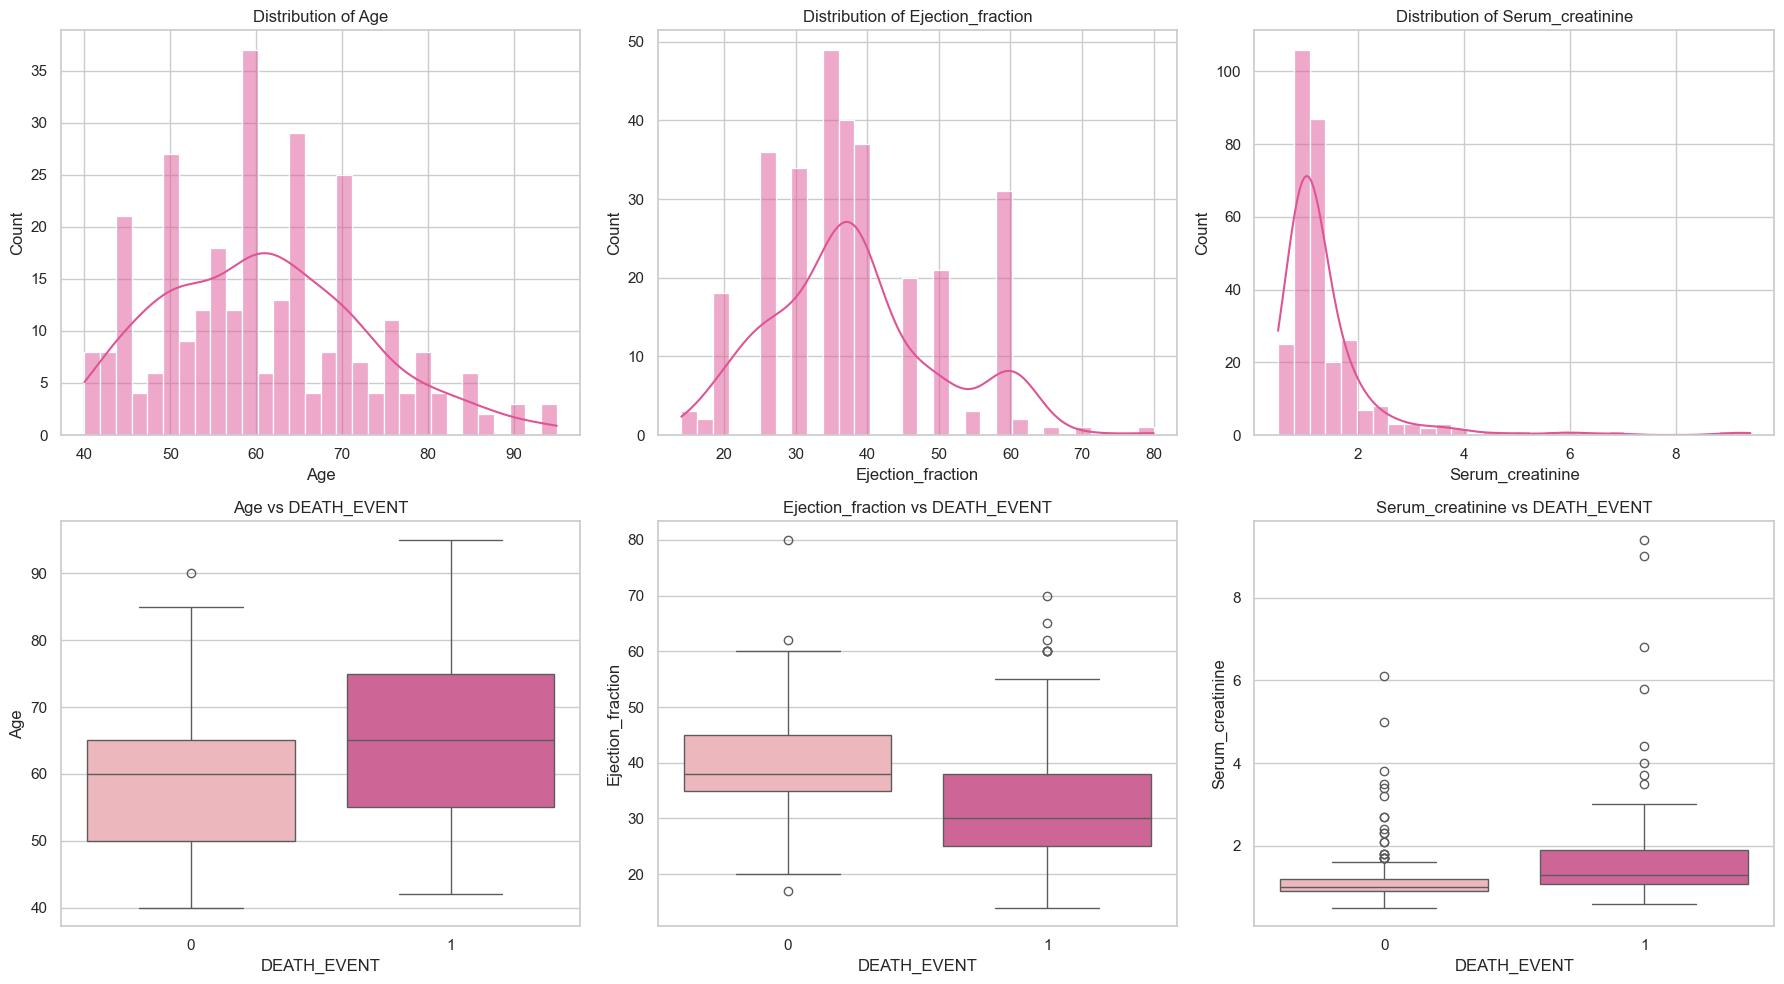

In [14]:
# Plot distribution and relationship with DEATH_EVENT for selected features
features = ['age', 'ejection_fraction', 'serum_creatinine']

plt.figure(figsize=(18, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], bins=30, kde=True, color='#DE5596')
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    
    plt.subplot(2, 3, i+3)
    sns.boxplot(x='DEATH_EVENT', y=feature, data=df, palette=['#F4B0B7', '#DE5596'])
    plt.title(f'{feature.capitalize()} vs DEATH_EVENT')
    plt.xlabel('DEATH_EVENT')
    plt.ylabel(feature.capitalize())

plt.tight_layout()
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression
import math

#Impact of DIABETES on DEATH
# Select the feature and the target
X = df[['diabetes']]
y = df['DEATH_EVENT']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Get the coefficient for diabetes
coefficient = logistic_model.coef_[0][0]
print('Log Value', coefficient)
print('Exponential Value', math.exp(coefficient))
expo= math.exp(coefficient)
print('Impact = ',round(((expo*100)-100), 1), '%' )

Log Value 0.014439372780497027
Exponential Value 1.0145441240974944
Impact =  1.5 %


In [16]:
#Impact of AGE on DEATH
# Select the feature and the target
X = df[['age']]
y = df['DEATH_EVENT']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Get the coefficient for diabetes
coefficient = logistic_model.coef_[0][0]
print('Log Value', coefficient)
print('Exponential Value', math.exp(coefficient))
expo= math.exp(coefficient)
print('Impact = ',round(((expo*100)-100), 1), '%' )

Log Value 0.05459758079951169
Exponential Value 1.0561155279833132
Impact =  5.6 %


In [17]:
#Impact of ANAEMIA on DEATH
# Select the feature and the target
X = df[['anaemia']]
y = df['DEATH_EVENT']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Get the coefficient for diabetes
coefficient = logistic_model.coef_[0][0]
print('Log Value', coefficient)
print('Exponential Value', math.exp(coefficient))
expo= math.exp(coefficient)
print('Impact = ',round(((expo*100)-100), 1), '%' )

Log Value 0.2332067329908871
Exponential Value 1.2626424822041462
Impact =  26.3 %


In [18]:
#Impact of Creatinine Phosphokinase on DEATH
# Select the feature and the target
X = df[['creatinine_phosphokinase']]
y = df['DEATH_EVENT']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Get the coefficient for diabetes
coefficient = logistic_model.coef_[0][0]
print('Log Value', coefficient)
print('Exponential Value', math.exp(coefficient))
expo= math.exp(coefficient)
print('Impact = ',round(((expo*100)-100), 1), '%' )

Log Value 7.750008428150426e-05
Exponential Value 1.0000775030874907
Impact =  0.0 %


In [19]:
#Impact of Ejection Fraction on DEATH
# Select the feature and the target
X = df[['ejection_fraction']]
y = df['DEATH_EVENT']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Get the coefficient for diabetes
coefficient = logistic_model.coef_[0][0]
print('Log Value', coefficient)
print('Exponential Value', math.exp(coefficient))
expo= math.exp(coefficient)
print('Impact = ',round(((expo*100)-100), 1), '%' )

Log Value -0.05632749527030779
Exponential Value 0.9452295269959927
Impact =  -5.5 %


In [20]:
#Impact of High Blood Pressure on DEATH
# Select the feature and the target
X = df[['high_blood_pressure']]
y = df['DEATH_EVENT']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Get the coefficient for diabetes
coefficient = logistic_model.coef_[0][0]
print('Log Value', coefficient)
print('Exponential Value', math.exp(coefficient))
expo= math.exp(coefficient)
print('Impact = ',round(((expo*100)-100), 1), '%' )

Log Value 0.24338220731670593
Exponential Value 1.2755560578203295
Impact =  27.6 %


In [21]:
#Impact of Platelets on DEATH
# Select the feature and the target
X = df[['platelets']]
y = df['DEATH_EVENT']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Get the coefficient for diabetes
coefficient = logistic_model.coef_[0][0]
print('Log Value', coefficient)
print('Exponential Value', math.exp(coefficient))
expo= math.exp(coefficient)
print('Impact = ',round(((expo*100)-100), 1), '%' )

Log Value -1.4133587187631327e-06
Exponential Value 0.99999858664228
Impact =  -0.0 %


In [22]:
#Impact of Serum Creatinine on DEATH
# Select the feature and the target
X = df[['serum_creatinine']]
y = df['DEATH_EVENT']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Get the coefficient for diabetes
coefficient = logistic_model.coef_[0][0]
print('Log Value', coefficient)
print('Exponential Value', math.exp(coefficient))
expo= math.exp(coefficient)
print('Impact = ',round(((expo*100)-100), 1), '%' )

Log Value 0.8590649790926288
Exponential Value 2.36095212174109
Impact =  136.1 %


In [23]:
#Impact of Sex on DEATH
# Select the feature and the target
X = df[['sex']]
y = df['DEATH_EVENT']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Get the coefficient for diabetes
coefficient = logistic_model.coef_[0][0]
print('Log Value', coefficient)
print('Exponential Value', math.exp(coefficient))
expo= math.exp(coefficient)
print('Impact = ',round(((expo*100)-100), 1), '%' )

Log Value -0.2188534455390564
Exponential Value 0.8034394571623725
Impact =  -19.7 %


In [24]:
#Impact of smkoing on DEATH
# Select the feature and the target
X = df[['smoking']]
y = df['DEATH_EVENT']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Get the coefficient for diabetes
coefficient = logistic_model.coef_[0][0]
print('Log Value', coefficient)
print('Exponential Value', math.exp(coefficient))
expo= math.exp(-coefficient)
print('Impact = ',round(((expo*100)-100), 1), '%' )

Log Value -0.19701604667098332
Exponential Value 0.8211774560424765
Impact =  21.8 %


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [26]:
# Define features and target
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 
            'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 
            'smoking', 'time']
X = df[features]
y = df['DEATH_EVENT']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Now let's analyze Person 1
person1_data = pd.DataFrame({
    'age': [35],
    'anaemia': [1],
    'creatinine_phosphokinase': [92],
    'diabetes': [1],
    'ejection_fraction': [29],
    'high_blood_pressure': [1],
    'platelets': [126000],
    'serum_creatinine': [1.9],
    'serum_sodium': [165],
    'sex': [0],
    'smoking': [1],
    'time': [16]
})

# Ensure person1_data has the same columns as X
person1_data = person1_data[X.columns]

# Scale person1_data
person1_scaled = scaler.transform(person1_data)

# Make prediction
prediction = rf_model.predict(person1_scaled)
probability = rf_model.predict_proba(person1_scaled)

print(f"\nPrediction for Person 1: {'High risk' if prediction[0] == 1 else 'Low risk'}")
print(f"Probability of death: {probability[0][1]:.2f}")

# Analyze feature importance
feature_importance = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Compare Person 1's values to dataset averages
comparison = pd.DataFrame({
    'Feature': features,
    'Person 1': person1_data.values[0],
    'Dataset Average': X.mean().values,
    'Importance': feature_importance['importance'].values
})
comparison = comparison.sort_values('Importance', ascending=False)

print("\nFeature Comparison:")
print(comparison)

Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60


Prediction for Person 1: High risk
Probability of death: 0.67

Feature Comparison:
                     Feature  Person 1  Dataset Average  Importance
0                        age      35.0        60.833893    0.375186
1                    anaemia       1.0         0.431438    0.155334
2   creatinine_phosphokinase      92.0       581.839465    0.112341
3                   diabetes       1.0         0.418060    0.082606
4          ejection_fraction      29.0        38.083612    0.078224
5        high_blood_pressure       1.0         0.351171    0.075128
6                  platelets  126000.0    263358.029264    0.064939
7     

In [27]:
# Now let's analyze Person 2
person1_data = pd.DataFrame({
    'age': [45],
    'anaemia': [1],
    'creatinine_phosphokinase': [981],
    'diabetes': [0],
    'ejection_fraction': [30],
    'high_blood_pressure': [0],
    'platelets': [136000],
    'serum_creatinine': [1.1],
    'serum_sodium': [137],
    'sex': [1],
    'smoking': [0],
    'time': [11]
})

# Ensure person1_data has the same columns as X
person1_data = person1_data[X.columns]

# Scale person1_data
person1_scaled = scaler.transform(person1_data)

# Make prediction
prediction = rf_model.predict(person1_scaled)
probability = rf_model.predict_proba(person1_scaled)

print(f"\nPrediction for Person 1: {'High risk' if prediction[0] == 1 else 'Low risk'}")
print(f"Probability of death: {probability[0][1]:.2f}")

# Analyze feature importance
feature_importance = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Compare Person 1's values to dataset averages
comparison = pd.DataFrame({
    'Feature': features,
    'Person 1': person1_data.values[0],
    'Dataset Average': X.mean().values,
    'Importance': feature_importance['importance'].values
})
comparison = comparison.sort_values('Importance', ascending=False)

print("\nFeature Comparison:")
print(comparison)


Prediction for Person 1: High risk
Probability of death: 0.95

Feature Comparison:
                     Feature  Person 1  Dataset Average  Importance
0                        age      45.0        60.833893    0.375186
1                    anaemia       1.0         0.431438    0.155334
2   creatinine_phosphokinase     981.0       581.839465    0.112341
3                   diabetes       0.0         0.418060    0.082606
4          ejection_fraction      30.0        38.083612    0.078224
5        high_blood_pressure       0.0         0.351171    0.075128
6                  platelets  136000.0    263358.029264    0.064939
7           serum_creatinine       1.1         1.393880    0.015220
8               serum_sodium     137.0       136.625418    0.011217
9                        sex       1.0         0.648829    0.010240
10                   smoking       0.0         0.321070    0.009785
11                      time      11.0       130.260870    0.009780


In [28]:
# Now let's analyze Person 3
person1_data = pd.DataFrame({
    'age': [45],
    'anaemia': [1],
    'creatinine_phosphokinase': [81],
    'diabetes': [0],
    'ejection_fraction': [30],
    'high_blood_pressure': [0],
    'platelets': [136000],
    'serum_creatinine': [1.1],
    'serum_sodium': [137],
    'sex': [1],
    'smoking': [0],
    'time': [11]
})

# Ensure person1_data has the same columns as X
person1_data = person1_data[X.columns]

# Scale person1_data
person1_scaled = scaler.transform(person1_data)

# Make prediction
prediction = rf_model.predict(person1_scaled)
probability = rf_model.predict_proba(person1_scaled)

print(f"\nPrediction for Person 1: {'High risk' if prediction[0] == 1 else 'Low risk'}")
print(f"Probability of death: {probability[0][1]:.2f}")

# Analyze feature importance
feature_importance = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Compare Person 1's values to dataset averages
comparison = pd.DataFrame({
    'Feature': features,
    'Person 1': person1_data.values[0],
    'Dataset Average': X.mean().values,
    'Importance': feature_importance['importance'].values
})
comparison = comparison.sort_values('Importance', ascending=False)

print("\nFeature Comparison:")
print(comparison)


Prediction for Person 1: High risk
Probability of death: 0.68

Feature Comparison:
                     Feature  Person 1  Dataset Average  Importance
0                        age      45.0        60.833893    0.375186
1                    anaemia       1.0         0.431438    0.155334
2   creatinine_phosphokinase      81.0       581.839465    0.112341
3                   diabetes       0.0         0.418060    0.082606
4          ejection_fraction      30.0        38.083612    0.078224
5        high_blood_pressure       0.0         0.351171    0.075128
6                  platelets  136000.0    263358.029264    0.064939
7           serum_creatinine       1.1         1.393880    0.015220
8               serum_sodium     137.0       136.625418    0.011217
9                        sex       1.0         0.648829    0.010240
10                   smoking       0.0         0.321070    0.009785
11                      time      11.0       130.260870    0.009780


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import math


# List of features to analyze
features = [
    'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
    'ejection_fraction', 'high_blood_pressure', 'platelets',
    'serum_creatinine', 'serum_sodium', 'sex', 'smoking'
]

# Target variable
y = df['DEATH_EVENT']

# Loop through each feature, fit the model, and calculate the impact
for feature in features:
    X = df[[feature]]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the logistic regression model
    logistic_model = LogisticRegression()
    logistic_model.fit(X_train, y_train)
    
    # Get the coefficient for the feature
    coefficient = logistic_model.coef_[0][0]
    
    # Calculate exponential value and impact
    exponential_value = math.exp(coefficient)
    impact = round(((exponential_value * 100) - 100), 1)
    
    # Print results
    print(f'Feature: {feature}')
    print(f'Log Value: {coefficient}')
    print(f'Exponential Value: {exponential_value}')
    print(f'Impact: {impact} %')
    print('---')


Feature: age
Log Value: 0.05459758079951169
Exponential Value: 1.0561155279833132
Impact: 5.6 %
---
Feature: anaemia
Log Value: 0.2332067329908871
Exponential Value: 1.2626424822041462
Impact: 26.3 %
---
Feature: creatinine_phosphokinase
Log Value: 7.750008428150426e-05
Exponential Value: 1.0000775030874907
Impact: 0.0 %
---
Feature: diabetes
Log Value: 0.014439372780497027
Exponential Value: 1.0145441240974944
Impact: 1.5 %
---
Feature: ejection_fraction
Log Value: -0.05632749527030779
Exponential Value: 0.9452295269959927
Impact: -5.5 %
---
Feature: high_blood_pressure
Log Value: 0.24338220731670593
Exponential Value: 1.2755560578203295
Impact: 27.6 %
---
Feature: platelets
Log Value: -1.4133587187631327e-06
Exponential Value: 0.99999858664228
Impact: -0.0 %
---
Feature: serum_creatinine
Log Value: 0.8590649790926288
Exponential Value: 2.36095212174109
Impact: 136.1 %
---
Feature: serum_sodium
Log Value: -0.09241175949900939
Exponential Value: 0.9117296588968957
Impact: -8.8 %
---
Fe

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.17868807219100896, 0.2648262172712773)

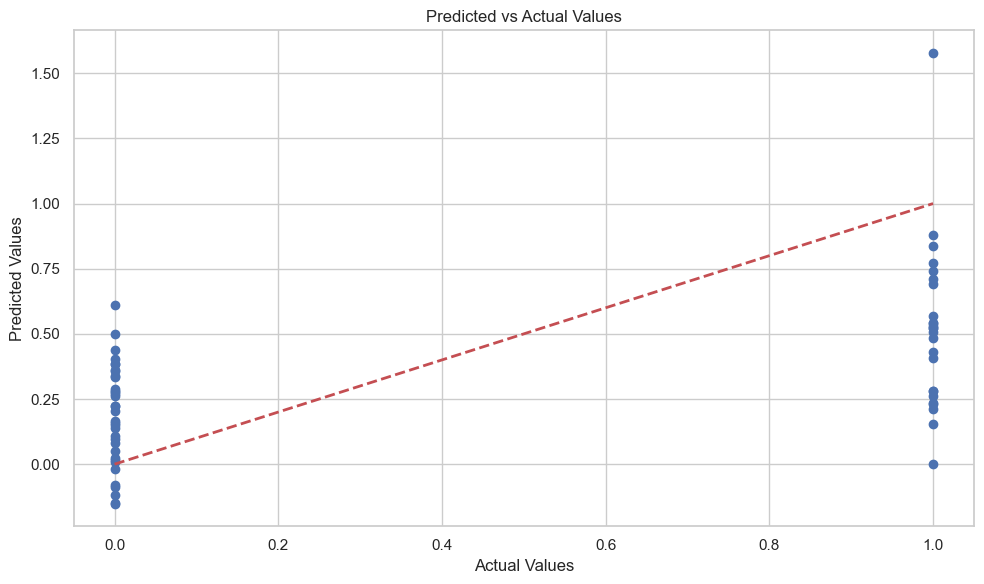

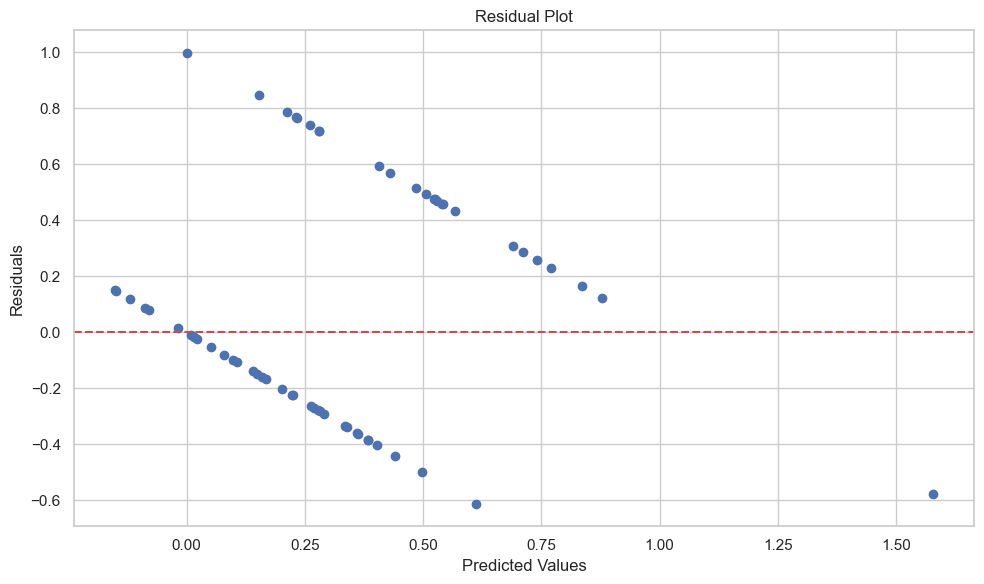

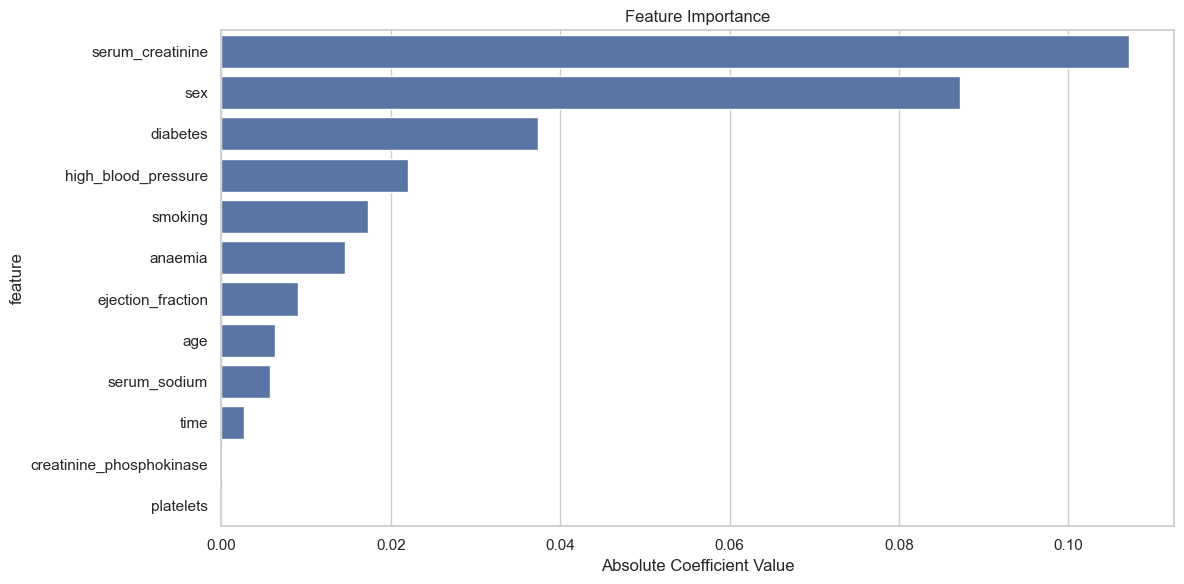

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Select features and target variable
features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
X = data[features]
y = data['DEATH_EVENT']

# Convert boolean columns to numeric
bool_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
X = pd.concat([X, data[bool_columns].astype(int)], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# 1. Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.tight_layout()
plt.show()

# 2. Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

# 3. Feature importance plot
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()